In [1]:
import numpy as np
import pandas as pd

In [2]:
match=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Python ml\matches.csv")
delivery=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Python ml\deliveries.csv")

In [3]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
match.shape

(1095, 20)

In [5]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [6]:
total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [7]:
total_score_df=total_score_df[total_score_df['inning']==1] 

In [8]:
total_score_df

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2207,1426307,1,214
2209,1426309,1,159
2211,1426310,1,172
2213,1426311,1,175


In [9]:
match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [10]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [12]:
match_df=match_df[['match_id','city','winner','target_runs']]

In [13]:
delivery_df=match_df.merge(delivery,on='match_id')

In [14]:
delivery_df=delivery_df[delivery_df['inning']==1]

In [15]:
delivery_df.shape

(135018, 20)

In [16]:
delivery_df

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260848,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,5,JD Unadkat,SP Narine,PJ Cummins,0,0,0,NaN,1,JD Unadkat,lbw,NaN
260849,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,6,B Kumar,SP Narine,PJ Cummins,0,0,0,NaN,0,NaN,NaN,NaN
260850,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,1,PJ Cummins,AD Russell,B Kumar,0,0,0,NaN,0,NaN,NaN,NaN
260851,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,2,PJ Cummins,AD Russell,B Kumar,0,0,0,NaN,0,NaN,NaN,NaN


In [20]:
delivery_df['batting_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Punjab Kings',
       'Royal Challengers Bengaluru', 'Delhi Capitals',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Gujarat Titans', 'Rising Pune Supergiant', 'Lucknow Super Giants'],
      dtype=object)

In [21]:
teams=['Sunrisers Hyderabad',
       'Royal Challengers Bengaluru',
       'Mumbai Indians',
       'Punjab Kings',
       'Rajasthan Royals',
       'Lucknow Super Giants',
       'Kolkata Knight Riders',
       'Gujarat Titans',
       'Chennai Super Kings',
       'Delhi Capitals']

In [31]:
delivery_df['batting_team']=delivery_df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
delivery_df['bowling_team']=delivery_df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')
delivery_df['winner']=delivery_df['winner'].str.replace('Delhi Daredevils','Delhi Capitals')

delivery_df['batting_team']=delivery_df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
delivery_df['bowling_team']=delivery_df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
delivery_df['winner']=delivery_df['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

delivery_df['batting_team']=delivery_df['batting_team'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
delivery_df['bowling_team']=delivery_df['bowling_team'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
delivery_df['winner']=delivery_df['winner'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')

delivery_df['batting_team']=delivery_df['batting_team'].str.replace('Kings XI Punjab','Punjab Kings')
delivery_df['bowling_team']=delivery_df['bowling_team'].str.replace('Kings XI Punjab','Punjab Kings')
delivery_df['winner']=delivery_df['winner'].str.replace('Kings XI Punjab','Punjab Kings')

delivery_df['batting_team']=delivery_df['batting_team'].str.replace('Gujarat Lions','Gujarat Titans')
delivery_df['bowling_team']=delivery_df['bowling_team'].str.replace('Gujarat Lions','Gujarat Titans')
delivery_df['winner']=delivery_df['winner'].str.replace('Gujarat Lions','Gujarat Titans')

In [32]:
delivery_df=delivery_df[delivery_df['batting_team'].isin(teams)]
delivery_df=delivery_df[delivery_df['bowling_team'].isin(teams)]
delivery_df=delivery_df[delivery_df['winner'].isin(teams)]

In [33]:
delivery_df.shape

(123754, 20)

In [34]:
delivery_df

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260848,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,5,JD Unadkat,SP Narine,PJ Cummins,0,0,0,NaN,1,JD Unadkat,lbw,NaN
260849,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,6,B Kumar,SP Narine,PJ Cummins,0,0,0,NaN,0,NaN,NaN,NaN
260850,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,1,PJ Cummins,AD Russell,B Kumar,0,0,0,NaN,0,NaN,NaN,NaN
260851,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,2,PJ Cummins,AD Russell,B Kumar,0,0,0,NaN,0,NaN,NaN,NaN


In [39]:
delivery_df['current_score']=delivery_df.groupby('match_id')['total_runs'].cumsum()

In [40]:
delivery_df

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,...,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
0,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,SC Ganguly,...,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,1
1,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,2,BB McCullum,...,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,1
2,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,3,BB McCullum,...,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,2
3,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,4,BB McCullum,...,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2
4,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,5,BB McCullum,...,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260848,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,5,JD Unadkat,...,PJ Cummins,0,0,0,NaN,1,JD Unadkat,lbw,NaN,113
260849,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,6,B Kumar,...,PJ Cummins,0,0,0,NaN,0,NaN,NaN,NaN,113
260850,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,1,PJ Cummins,...,B Kumar,0,0,0,NaN,0,NaN,NaN,NaN,113
260851,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,2,PJ Cummins,...,B Kumar,0,0,0,NaN,0,NaN,NaN,NaN,113


In [41]:
delivery_df['runs_left']=delivery_df['target_runs']-delivery_df['current_score']

In [42]:
delivery_df

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,...,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left
0,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,SC Ganguly,...,0,1,1,legbyes,0,NaN,NaN,NaN,1,222.0
1,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,2,BB McCullum,...,0,0,0,NaN,0,NaN,NaN,NaN,1,222.0
2,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,3,BB McCullum,...,0,1,1,wides,0,NaN,NaN,NaN,2,221.0
3,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,4,BB McCullum,...,0,0,0,NaN,0,NaN,NaN,NaN,2,221.0
4,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,5,BB McCullum,...,0,0,0,NaN,0,NaN,NaN,NaN,2,221.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260848,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,5,JD Unadkat,...,0,0,0,NaN,1,JD Unadkat,lbw,NaN,113,1.0
260849,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,6,B Kumar,...,0,0,0,NaN,0,NaN,NaN,NaN,113,1.0
260850,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,1,PJ Cummins,...,0,0,0,NaN,0,NaN,NaN,NaN,113,1.0
260851,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,2,PJ Cummins,...,0,0,0,NaN,0,NaN,NaN,NaN,113,1.0


In [43]:
delivery_df['balls_left']=120-((delivery_df['over'])*6+delivery_df['ball'])

In [44]:
delivery_df

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
0,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,SC Ganguly,...,1,1,legbyes,0,NaN,NaN,NaN,1,222.0,119
1,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,2,BB McCullum,...,0,0,NaN,0,NaN,NaN,NaN,1,222.0,118
2,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,3,BB McCullum,...,1,1,wides,0,NaN,NaN,NaN,2,221.0,117
3,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,4,BB McCullum,...,0,0,NaN,0,NaN,NaN,NaN,2,221.0,116
4,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,5,BB McCullum,...,0,0,NaN,0,NaN,NaN,NaN,2,221.0,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260848,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,5,JD Unadkat,...,0,0,NaN,1,JD Unadkat,lbw,NaN,113,1.0,13
260849,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,6,B Kumar,...,0,0,NaN,0,NaN,NaN,NaN,113,1.0,12
260850,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,1,PJ Cummins,...,0,0,NaN,0,NaN,NaN,NaN,113,1.0,11
260851,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,2,PJ Cummins,...,0,0,NaN,0,NaN,NaN,NaN,113,1.0,10


In [45]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x:x if x=="0" else "1")
delivery_df['player_dismissed']=delivery_df['player_dismissed'].astype('int')
wickets=delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets_left']=10-wickets
delivery_df.head()

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,...,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
0,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,SC Ganguly,...,1,legbyes,0,0,NaN,NaN,1,222.0,119,10
1,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,2,BB McCullum,...,0,NaN,0,0,NaN,NaN,1,222.0,118,10
2,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,3,BB McCullum,...,1,wides,0,0,NaN,NaN,2,221.0,117,10
3,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,4,BB McCullum,...,0,NaN,0,0,NaN,NaN,2,221.0,116,10
4,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,5,BB McCullum,...,0,NaN,0,0,NaN,NaN,2,221.0,115,10


In [46]:
delivery_df.tail()

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,...,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
260848,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,5,JD Unadkat,...,0,NaN,1,1,lbw,NaN,113,1.0,13,1
260849,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,6,B Kumar,...,0,NaN,0,0,NaN,NaN,113,1.0,12,1
260850,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,1,PJ Cummins,...,0,NaN,0,0,NaN,NaN,113,1.0,11,1
260851,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,2,PJ Cummins,...,0,NaN,0,0,NaN,NaN,113,1.0,10,1
260852,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,3,PJ Cummins,...,0,NaN,1,1,caught,MA Starc,113,1.0,9,0


In [47]:
# crr=runs/overs
delivery_df['crr']=(delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

In [48]:
delivery_df['rrr']=(delivery_df['runs_left']*6)/delivery_df['balls_left']

In [49]:
delivery_df

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr
0,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,SC Ganguly,...,0,0,NaN,NaN,1,222.0,119,10,6.000000,11.193277
1,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,2,BB McCullum,...,0,0,NaN,NaN,1,222.0,118,10,3.000000,11.288136
2,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,3,BB McCullum,...,0,0,NaN,NaN,2,221.0,117,10,4.000000,11.333333
3,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,4,BB McCullum,...,0,0,NaN,NaN,2,221.0,116,10,3.000000,11.431034
4,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,5,BB McCullum,...,0,0,NaN,NaN,2,221.0,115,10,2.400000,11.530435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260848,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,5,JD Unadkat,...,1,1,lbw,NaN,113,1.0,13,1,6.336449,0.461538
260849,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,6,B Kumar,...,0,0,NaN,NaN,113,1.0,12,1,6.277778,0.500000
260850,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,1,PJ Cummins,...,0,0,NaN,NaN,113,1.0,11,1,6.220183,0.545455
260851,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,2,PJ Cummins,...,0,0,NaN,NaN,113,1.0,10,1,6.163636,0.600000


In [50]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

In [51]:
delivery_df['result']=delivery_df.apply(result,axis=1)

In [52]:
delivery_df

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
0,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,SC Ganguly,...,0,NaN,NaN,1,222.0,119,10,6.000000,11.193277,1
1,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,2,BB McCullum,...,0,NaN,NaN,1,222.0,118,10,3.000000,11.288136,1
2,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,3,BB McCullum,...,0,NaN,NaN,2,221.0,117,10,4.000000,11.333333,1
3,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,4,BB McCullum,...,0,NaN,NaN,2,221.0,116,10,3.000000,11.431034,1
4,335982,Bangalore,Kolkata Knight Riders,223.0,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,5,BB McCullum,...,0,NaN,NaN,2,221.0,115,10,2.400000,11.530435,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260848,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,5,JD Unadkat,...,1,lbw,NaN,113,1.0,13,1,6.336449,0.461538,0
260849,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,6,B Kumar,...,0,NaN,NaN,113,1.0,12,1,6.277778,0.500000,0
260850,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,1,PJ Cummins,...,0,NaN,NaN,113,1.0,11,1,6.220183,0.545455,0
260851,1426312,Chennai,Kolkata Knight Riders,114.0,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,2,PJ Cummins,...,0,NaN,NaN,113,1.0,10,1,6.163636,0.600000,0


In [53]:
final_df=delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','target_runs','crr','rrr','result']]

In [54]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,target_runs,crr,rrr,result
0,Kolkata Knight Riders,Royal Challengers Bengaluru,Bangalore,222.0,119,10,223.0,6.000000,11.193277,1
1,Kolkata Knight Riders,Royal Challengers Bengaluru,Bangalore,222.0,118,10,223.0,3.000000,11.288136,1
2,Kolkata Knight Riders,Royal Challengers Bengaluru,Bangalore,221.0,117,10,223.0,4.000000,11.333333,1
3,Kolkata Knight Riders,Royal Challengers Bengaluru,Bangalore,221.0,116,10,223.0,3.000000,11.431034,1
4,Kolkata Knight Riders,Royal Challengers Bengaluru,Bangalore,221.0,115,10,223.0,2.400000,11.530435,1
...,...,...,...,...,...,...,...,...,...,...
260848,Sunrisers Hyderabad,Kolkata Knight Riders,Chennai,1.0,13,1,114.0,6.336449,0.461538,0
260849,Sunrisers Hyderabad,Kolkata Knight Riders,Chennai,1.0,12,1,114.0,6.277778,0.500000,0
260850,Sunrisers Hyderabad,Kolkata Knight Riders,Chennai,1.0,11,1,114.0,6.220183,0.545455,0
260851,Sunrisers Hyderabad,Kolkata Knight Riders,Chennai,1.0,10,1,114.0,6.163636,0.600000,0


In [55]:
final_df=final_df.sample(final_df.shape[0])

In [56]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,target_runs,crr,rrr,result
134410,Sunrisers Hyderabad,Delhi Capitals,Raipur,158.0,115,10,159.0,1.2,8.243478,0


In [57]:
final_df=final_df[final_df['balls_left']!=0]

In [58]:
final_df.dropna(inplace=True)

In [59]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,target_runs,crr,rrr,result
93906,Sunrisers Hyderabad,Rajasthan Royals,Delhi,49.0,24,6,133.0,5.250000,12.250000,0
10913,Mumbai Indians,Delhi Capitals,Delhi,98.0,65,9,177.0,8.618182,9.046154,0
150979,Royal Challengers Bengaluru,Kolkata Knight Riders,Kolkata,131.0,85,9,177.0,7.885714,9.247059,0
176555,Chennai Super Kings,Delhi Capitals,Chennai,35.0,10,7,180.0,7.909091,21.000000,1
238045,Gujarat Titans,Lucknow Super Giants,Ahmedabad,189.0,99,10,228.0,11.142857,11.454545,1
...,...,...,...,...,...,...,...,...,...,...
152404,Mumbai Indians,Delhi Capitals,Mumbai,8.0,7,4,195.0,9.929204,6.857143,0
26941,Sunrisers Hyderabad,Royal Challengers Bengaluru,Johannesburg,44.0,29,7,144.0,6.593407,9.103448,1
35,Kolkata Knight Riders,Royal Challengers Bengaluru,Bangalore,162.0,86,9,223.0,10.764706,11.302326,1
103100,Rajasthan Royals,Chennai Super Kings,Ranchi,140.0,105,10,149.0,3.600000,8.000000,0


In [62]:
final_df.shape

(116526, 10)

In [60]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116526 entries, 93906 to 205774
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   batting_team  116526 non-null  object 
 1   bowling_team  116526 non-null  object 
 2   city          116526 non-null  object 
 3   runs_left     116526 non-null  float64
 4   balls_left    116526 non-null  int64  
 5   wickets_left  116526 non-null  int32  
 6   target_runs   116526 non-null  float64
 7   crr           116526 non-null  float64
 8   rrr           116526 non-null  float64
 9   result        116526 non-null  int64  
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 9.3+ MB


In [61]:
final_df.describe()

,runs_left,balls_left,wickets_left,target_runs,crr,rrr,result
count,116526.000000,116526.000000,116526.000000,116526.000000,116526.000000,116526.000000,116526.000000
mean,89.665808,60.075176,7.591739,167.533460,7.483631,9.593686,0.458593
std,52.672006,34.431964,2.014951,32.814875,2.277403,6.930964,0.498285
min,-100.000000,-4.000000,0.000000,43.000000,0.000000,-600.000000,0.000000
25%,47.000000,30.000000,6.000000,148.000000,6.258065,7.753846,0.000000
50%,88.000000,60.000000,8.000000,168.000000,7.533333,9.250000,0.000000
75%,129.000000,90.000000,9.000000,188.000000,8.721649,11.100000,1.000000
max,288.000000,119.000000,10.000000,288.000000,36.000000,534.000000,1.000000


In [63]:
print(final_df.isnull().sum())

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets_left    0
target_runs     0
crr             0
rrr             0
result          0
dtype: int64


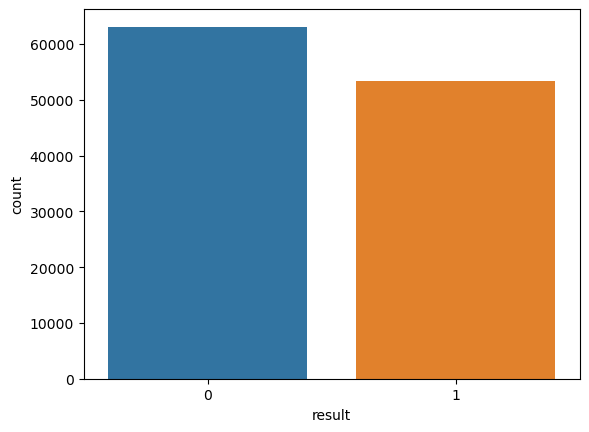

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='result',data=final_df)
plt.show()
#This graph shows that how many times the batting team in the 1st inning has 
#won the match(1) or lose the match(0)

In [74]:
#only numeric cols
final_df2=final_df[['runs_left','balls_left','wickets_left','target_runs','crr','rrr','result']]

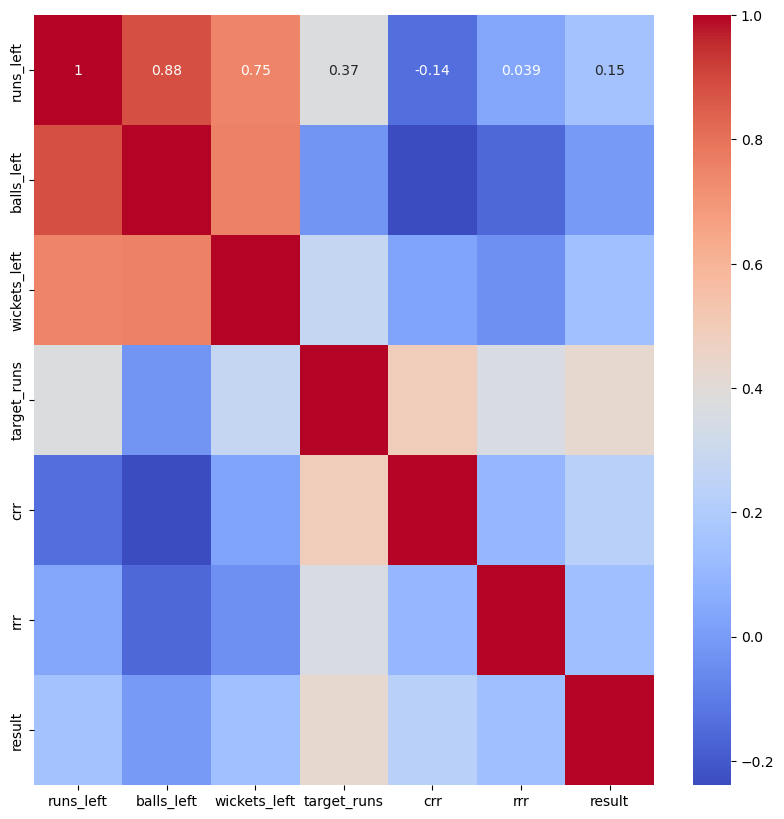

In [75]:
#Visualizing Correlations
fig=plt.figure(figsize=(10,10))
correlation_matrix=final_df2.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

In [76]:
X=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [77]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,target_runs,crr,rrr
9565,Kolkata Knight Riders,Chennai Super Kings,Kolkata,-40.0,35,8,53.0,6.564706,-6.857143
38792,Rajasthan Royals,Royal Challengers Bengaluru,Jaipur,95.0,76,7,131.0,4.909091,7.500000
41932,Sunrisers Hyderabad,Rajasthan Royals,Hyderabad,35.0,25,5,138.0,6.505263,8.400000
142127,Mumbai Indians,Delhi Capitals,Mumbai,117.0,104,10,143.0,9.750000,6.750000
113811,Delhi Capitals,Mumbai Indians,Delhi,23.0,15,8,191.0,9.600000,9.200000
...,...,...,...,...,...,...,...,...,...
257952,Gujarat Titans,Chennai Super Kings,Ahmedabad,36.0,23,10,232.0,12.123711,9.391304
236557,Delhi Capitals,Gujarat Titans,Ahmedabad,87.0,65,5,131.0,4.800000,8.030769
236305,Royal Challengers Bengaluru,Lucknow Super Giants,Lucknow,71.0,70,10,127.0,6.720000,6.085714
92094,Mumbai Indians,Rajasthan Royals,Mumbai,42.0,34,7,167.0,8.720930,7.411765


In [78]:
X_train.describe()

,runs_left,balls_left,wickets_left,target_runs,crr,rrr
count,81568.000000,81568.000000,81568.000000,81568.000000,81568.000000,81568.000000
mean,89.664795,60.074110,7.588895,167.542345,7.480600,9.588665
std,52.708977,34.443001,2.020447,32.859846,2.271466,7.271947
min,-100.000000,-4.000000,0.000000,43.000000,0.000000,-600.000000
25%,47.000000,30.000000,6.000000,148.000000,6.258621,7.753846
50%,88.000000,60.000000,8.000000,168.000000,7.534884,9.250000
75%,129.000000,90.000000,9.000000,188.000000,8.715789,11.100000
max,288.000000,119.000000,10.000000,288.000000,36.000000,534.000000


In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf=ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
]
                      ,remainder='passthrough')

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [85]:
pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [86]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [87]:
y_pred=pipe.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y_pred)
print("Confusion matrix for logistic regression:\n",cm1)
accuracy1=accuracy_score(y_test,y_pred)
print("Accuracy score for logistic regression:\n",accuracy1)
print("Classification Report:\n",classification_report(y_test,y_pred))

Confusion matrix for logistic regression:
 [[14594  4257]
 [ 4988 11119]]
Accuracy score for logistic regression:
 0.7355397906058699
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76     18851
           1       0.72      0.69      0.71     16107

    accuracy                           0.74     34958
   macro avg       0.73      0.73      0.73     34958
weighted avg       0.74      0.74      0.73     34958



In [116]:
X_test

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,target_runs,crr,rrr
228243,Sunrisers Hyderabad,Lucknow Super Giants,Lucknow,28.0,16,5,122.0,5.423077,10.500000
139300,Royal Challengers Bengaluru,Mumbai Indians,Bangalore,15.0,10,5,143.0,6.981818,9.000000
238128,Gujarat Titans,Lucknow Super Giants,Ahmedabad,35.0,19,8,228.0,11.465347,11.052632
219069,Chennai Super Kings,Sunrisers Hyderabad,Pune,36.0,23,10,203.0,10.329897,9.391304
66013,Punjab Kings,Mumbai Indians,Chandigarh,116.0,65,8,169.0,5.781818,10.707692
...,...,...,...,...,...,...,...,...,...
107107,Royal Challengers Bengaluru,Chennai Super Kings,Bangalore,39.0,20,6,155.0,6.960000,11.700000
257008,Sunrisers Hyderabad,Mumbai Indians,Mumbai,88.0,62,8,174.0,8.896552,8.516129
216387,Gujarat Titans,Kolkata Knight Riders,Navi Mumbai,62.0,49,8,157.0,8.028169,7.591837
72564,Sunrisers Hyderabad,Punjab Kings,Chandigarh,77.0,41,8,191.0,8.658228,11.268293


In [89]:
pipe.predict_proba(X_test)[0]

array([0.88305876, 0.11694124])

In [90]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','target_runs','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['target_runs'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [91]:
temp_df,target=match_progression(delivery_df,1136561,pipe)
temp_df

Target- 166.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
150465,1,5.0,0,65.2,34.8
150471,2,2.0,0,66.5,33.5
150477,3,5.0,1,67.1,32.9
150483,4,8.0,1,67.1,32.9
150490,5,6.0,0,67.4,32.6
150496,6,13.0,0,66.4,33.6
150502,7,4.0,0,67.2,32.8
150508,8,9.0,0,67.0,33.0
150514,9,10.0,0,66.6,33.4
150520,10,3.0,0,67.6,32.4


Text(0.5, 1.0, 'Target-166.0')

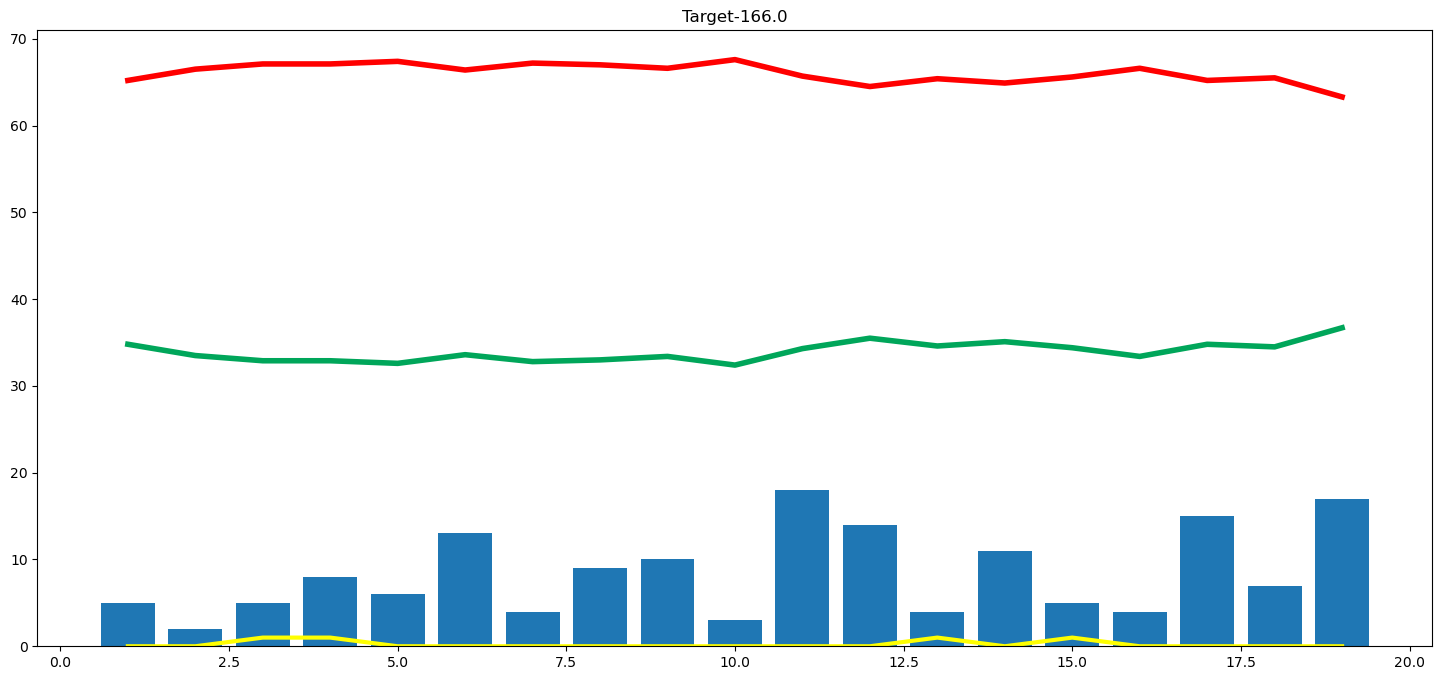

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [93]:
from sklearn.ensemble import RandomForestClassifier
pipe2=Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])

In [94]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [95]:
y_pred2=pipe2.predict(X_test)

In [96]:
cm2=confusion_matrix(y_test,y_pred2)
print("Confusion matrix for logistic regression:\n",cm2)
accuracy2=accuracy_score(y_test,y_pred2)
print("Accuracy score for logistic regression:\n",accuracy2)
print("Classification Report:\n",classification_report(y_test,y_pred2))

Confusion matrix for logistic regression:
 [[18816    35]
 [   34 16073]]
Accuracy score for logistic regression:
 0.9980262028720178
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18851
           1       1.00      1.00      1.00     16107

    accuracy                           1.00     34958
   macro avg       1.00      1.00      1.00     34958
weighted avg       1.00      1.00      1.00     34958



In [97]:
pipe2.predict_proba(X_test)[0]

array([1., 0.])

In [98]:
temp_df2,target2=match_progression(delivery_df,1136561,pipe2)
temp_df2

Target- 166.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
150465,1,5.0,0,95.0,5.0
150471,2,2.0,0,87.0,13.0
150477,3,5.0,1,79.0,21.0
150483,4,8.0,1,99.0,1.0
150490,5,6.0,0,99.0,1.0
150496,6,13.0,0,83.0,17.0
150502,7,4.0,0,100.0,0.0
150508,8,9.0,0,95.0,5.0
150514,9,10.0,0,95.0,5.0
150520,10,3.0,0,58.0,42.0


Text(0.5, 1.0, 'Target-166.0')

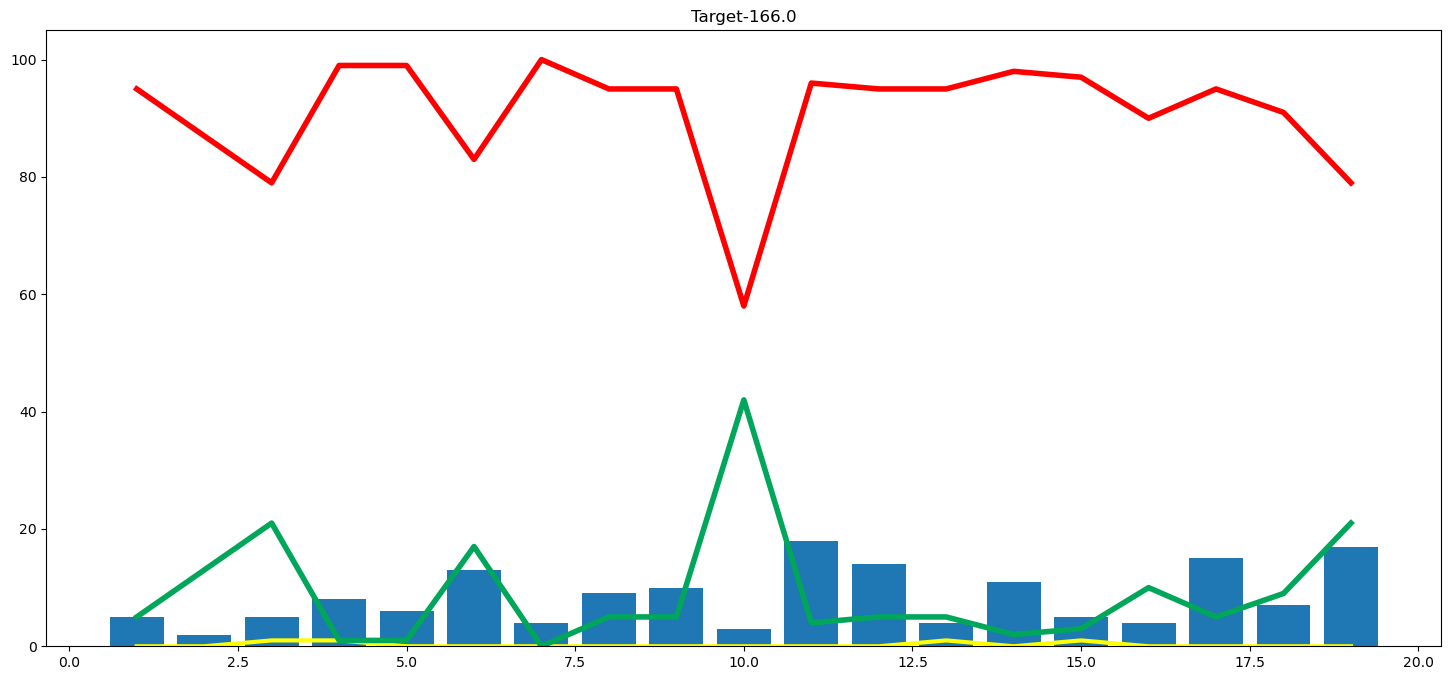

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df2['end_of_over'],temp_df2['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df2['end_of_over'],temp_df2['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df2['end_of_over'],temp_df2['lose'],color='red',linewidth=4)
plt.bar(temp_df2['end_of_over'],temp_df2['runs_after_over'])
plt.title('Target-' + str(target2))

In [100]:
from sklearn.tree import DecisionTreeClassifier
pipe3=Pipeline(steps=[
    ('step1',trf),
    ('step2',DecisionTreeClassifier())
])

In [101]:
pipe3.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', DecisionTreeClassifier())])

In [103]:
y_pred3=pipe3.predict(X_test)

In [104]:
cm3=confusion_matrix(y_test,y_pred3)
print("Confusion matrix for logistic regression:\n",cm3)
accuracy3=accuracy_score(y_test,y_pred3)
print("Accuracy score for logistic regression:\n",accuracy3)
print("Classification Report:\n",classification_report(y_test,y_pred3))

Confusion matrix for logistic regression:
 [[18828    23]
 [   39 16068]]
Accuracy score for logistic regression:
 0.9982264431603639
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18851
           1       1.00      1.00      1.00     16107

    accuracy                           1.00     34958
   macro avg       1.00      1.00      1.00     34958
weighted avg       1.00      1.00      1.00     34958



In [105]:
pipe3.predict_proba(X_test)[0]

array([1., 0.])

In [106]:
temp_df3,target3=match_progression(delivery_df,1136561,pipe3)
temp_df3

Target- 166.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
150465,1,5.0,0,100.0,0.0
150471,2,2.0,0,100.0,0.0
150477,3,5.0,1,100.0,0.0
150483,4,8.0,1,100.0,0.0
150490,5,6.0,0,100.0,0.0
150496,6,13.0,0,100.0,0.0
150502,7,4.0,0,100.0,0.0
150508,8,9.0,0,100.0,0.0
150514,9,10.0,0,100.0,0.0
150520,10,3.0,0,100.0,0.0


Text(0.5, 1.0, 'Target-166.0')

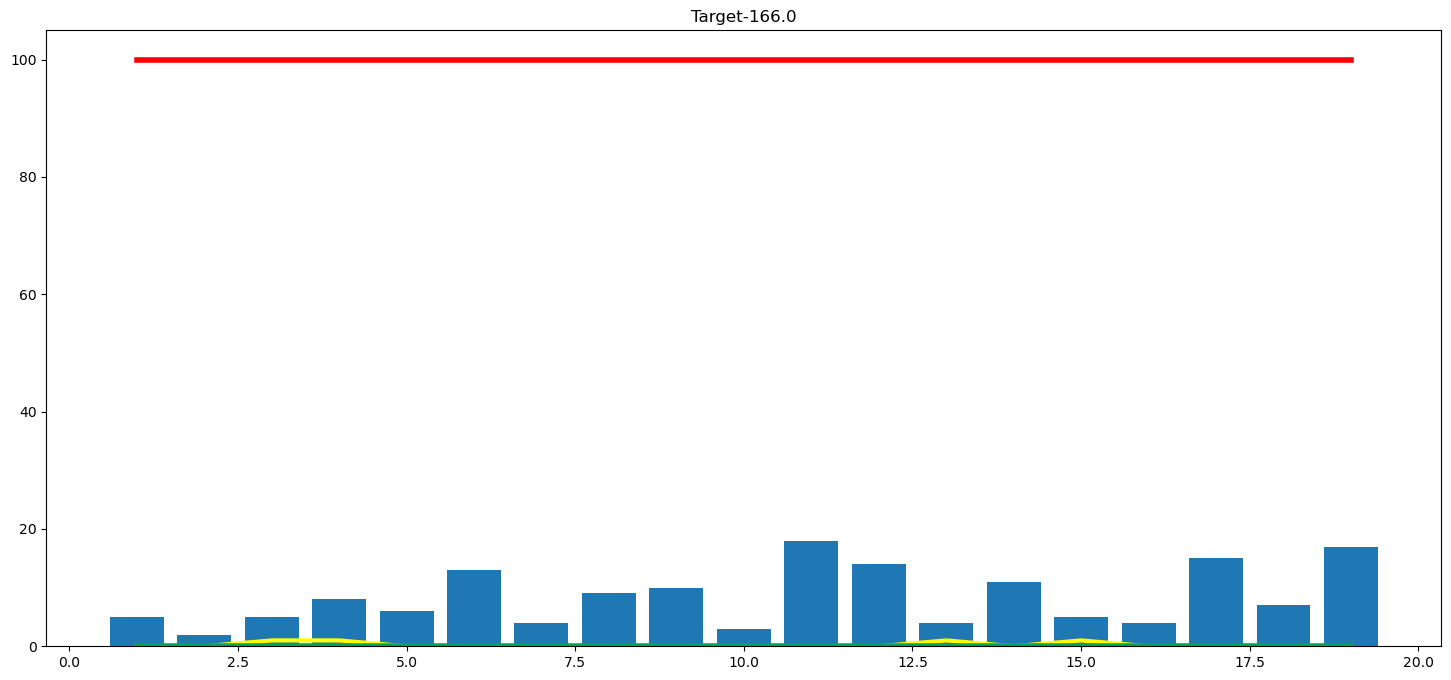

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df3['end_of_over'],temp_df3['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df3['end_of_over'],temp_df3['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df3['end_of_over'],temp_df3['lose'],color='red',linewidth=4)
plt.bar(temp_df3['end_of_over'],temp_df3['runs_after_over'])
plt.title('Target-' + str(target3))

In [109]:
teams

['Sunrisers Hyderabad',
 'Royal Challengers Bengaluru',
 'Mumbai Indians',
 'Punjab Kings',
 'Rajasthan Royals',
 'Lucknow Super Giants',
 'Kolkata Knight Riders',
 'Gujarat Titans',
 'Chennai Super Kings',
 'Delhi Capitals']

In [111]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Rajkot', 'Kanpur', 'Bengaluru', 'Indore', 'Dubai', 'Sharjah',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [119]:
import pickle
pickle.dump(pipe,open('pipe2.pkl','wb'))